In [1]:
import nltk
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to C:\Users\Aashima
[nltk_data]     Bhatia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Aashima
[nltk_data]     Bhatia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from collections import Counter 
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud , STOPWORDS 
import nltk 
import re 
from nltk.stem import PorterStemmer , WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize , sent_tokenize
import gensim
from gensim.utils import simple_preprocess 
from gensim.parsing.preprocessing import STOPWORDS 
from tensorflow.keras.preprocessing.text import one_hot , Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense , Flatten , TimeDistributed , RepeatVector , Embedding , Input , LSTM , Conv1D , MaxPool1D , Bidirectional 
from tensorflow.keras.models import Model 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
eng = pd.read_csv(r'small_vocab_en.csv' , sep = '/t' , names = ['english'] , engine = "python")
french = pd.read_csv(r'small_vocab_fr.csv' , sep = '/t' , names = ['french'] , engine = "python" )

In [4]:
eng.head()

,english
0,"""new jersey is sometimes quiet during autumn ,..."
1,"""the united states is usually chilly during ju..."
2,"""california is usually quiet during march , an..."
3,"""the united states is sometimes mild during ju..."
4,"""your least liked fruit is the grape , but my ..."


In [5]:
eng.tail()

,english
137855,"""france is never busy during march , and it is..."
137856,"""india is sometimes beautiful during spring , ..."
137857,"""india is never wet during summer , but it is ..."
137858,"""france is never chilly during january , but i..."
137859,"""the orange is her favorite fruit , but the ba..."


In [6]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [7]:
eng.describe()

,english
count,137860
unique,129174
top,"""he dislikes pears , strawberries , and limes ."""
freq,3


In [8]:
eng.isnull().sum()

english    0
dtype: int64

In [9]:
french.head()

,french
0,"""new jersey est parfois calme pendant l' autom..."
1,"""les états-unis est généralement froid en juil..."
2,"""california est généralement calme en mars , e..."
3,"""les états-unis est parfois légère en juin , e..."
4,"""votre moins aimé fruit est le raisin , mais m..."


In [10]:
french.tail()

,french
137855,"""la france est jamais occupée en mars , et il ..."
137856,"""l' inde est parfois belle au printemps , et i..."
137857,"""l' inde est jamais mouillé pendant l' été , m..."
137858,"""la france est jamais froid en janvier , mais ..."
137859,"""l'orange est son fruit préféré , mais la bana..."


In [11]:
french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [12]:
french.describe()

,french
count,137860
unique,120806
top,"""elle aime les bananes , citrons verts et les ..."
freq,6


In [13]:
french.isnull().sum()

french    0
dtype: int64

In [14]:
#combining english french data 
data = pd.concat([eng , french] , axis = 1 )
data.head()

,english,french
0,"""new jersey is sometimes quiet during autumn ,...","""new jersey est parfois calme pendant l' autom..."
1,"""the united states is usually chilly during ju...","""les états-unis est généralement froid en juil..."
2,"""california is usually quiet during march , an...","""california est généralement calme en mars , e..."
3,"""the united states is sometimes mild during ju...","""les états-unis est parfois légère en juin , e..."
4,"""your least liked fruit is the grape , but my ...","""votre moins aimé fruit est le raisin , mais m..."


In [15]:
def remove_punc(x):
    return re.sub('[?.,!#:;"]','',x)

In [16]:
data['french'] = data['french'].apply(remove_punc)
data['english'] = data['english'].apply(remove_punc)

In [17]:
eng_words = []
french_words = []

In [18]:
#function to get list of unique words 
def get_label_superset( x , word_list):
    for label in x.split():
        if label not in word_list:
            word_list.append(label)


In [19]:
data['english'].apply(lambda x:get_label_superset(x, eng_words))
data['french'].apply(lambda x : get_label_superset(x , french_words))

#number of unique words in english 
total_eng_words = len(eng_words)
total_eng_words 

199

In [20]:
#number of unique words in french
total_french_words = len(french_words)
total_french_words 

350

In [21]:
# list of all words in english 
words = []
for i in data['english']:
    for word in i.split():
        words.append(word)
        
words    

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 'new',
 'jersey',
 'is',
 'busy',
 'during',
 'spring',
 'and',
 'it',
 'is',
 'never',
 'hot',
 'in',
 'march',
 'our',
 'leas

In [22]:
# total count of words 
eng_word_count = Counter(words)
eng_word_count 

Counter({'is': 205858,
         'in': 75525,
         'it': 75137,
         'during': 74933,
         'the': 67628,
         'but': 63987,
         'and': 59850,
         'sometimes': 37746,
         'usually': 37507,
         'never': 37500,
         'favorite': 28332,
         'least': 27564,
         'fruit': 27192,
         'most': 14934,
         'loved': 14166,
         'liked': 14046,
         'new': 12197,
         'paris': 11334,
         'india': 11277,
         'united': 11270,
         'states': 11270,
         'california': 11250,
         'jersey': 11225,
         'france': 11170,
         'china': 10953,
         'he': 10786,
         'she': 10786,
         'grapefruit': 10692,
         'your': 9734,
         'my': 9700,
         'his': 9700,
         'her': 9700,
         'fall': 9134,
         'june': 9133,
         'spring': 9102,
         'january': 9090,
         'winter': 9038,
         'march': 9023,
         'autumn': 9004,
         'may': 8995,
         'nice': 

In [23]:
# sort dictionary by value 
eng_word_count = sorted(eng_word_count.items() , key = operator.itemgetter(1) , reverse = True )

In [24]:
eng_word_count

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [25]:
eng_words = []
eng_counts = [] 
for i in range(len(eng_word_count)):
    eng_words.append(eng_word_count[i][0])
    eng_counts.append(eng_word_count[i][1])


In [26]:
eng_words

['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'favorite',
 'least',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'lemons',
 'grapes',
 'mangoes',
 'apples',
 'peaches',
 'oranges',
 'pears',
 'strawberries',
 'bananas',
 'to',
 'grape',
 'apple',
 'orange',
 'lemon',
 'lime',
 'banana',
 'mango',
 'pear',
 'strawberry',
 'peach',
 'like',
 'dislike',
 'they',
 'that',
 'i',
 'we',


In [27]:
eng_counts

[205858,
 75525,
 75137,
 74933,
 67628,
 63987,
 59850,
 37746,
 37507,
 37500,
 28332,
 27564,
 27192,
 14934,
 14166,
 14046,
 12197,
 11334,
 11277,
 11270,
 11270,
 11250,
 11225,
 11170,
 10953,
 10786,
 10786,
 10692,
 9734,
 9700,
 9700,
 9700,
 9134,
 9133,
 9102,
 9090,
 9038,
 9023,
 9004,
 8995,
 8984,
 8958,
 8956,
 8954,
 8951,
 8948,
 8945,
 8942,
 8932,
 8932,
 8928,
 8916,
 8915,
 8910,
 8898,
 8890,
 8878,
 8808,
 8794,
 8791,
 8789,
 8770,
 8761,
 8743,
 8726,
 8696,
 8693,
 8639,
 7314,
 7314,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5166,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4588,
 4444,
 3222,
 2712,
 2664,
 2532,
 2414,
 2304,
 1944,
 1944,
 1944,
 1944,
 1867,
 1666,
 1386,
 1296,
 1224,
 1016,
 1016,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 870,
 781,
 768,
 768,
 768,
 714,
 666,
 648,
 648,
 648,
 648,
 540,
 480,
 476,
 384,
 378,
 378,
 378,
 360,
 312,
 312,
 312,
 312,
 312,
 30

In [28]:
import matplotlib.ticker as ticker

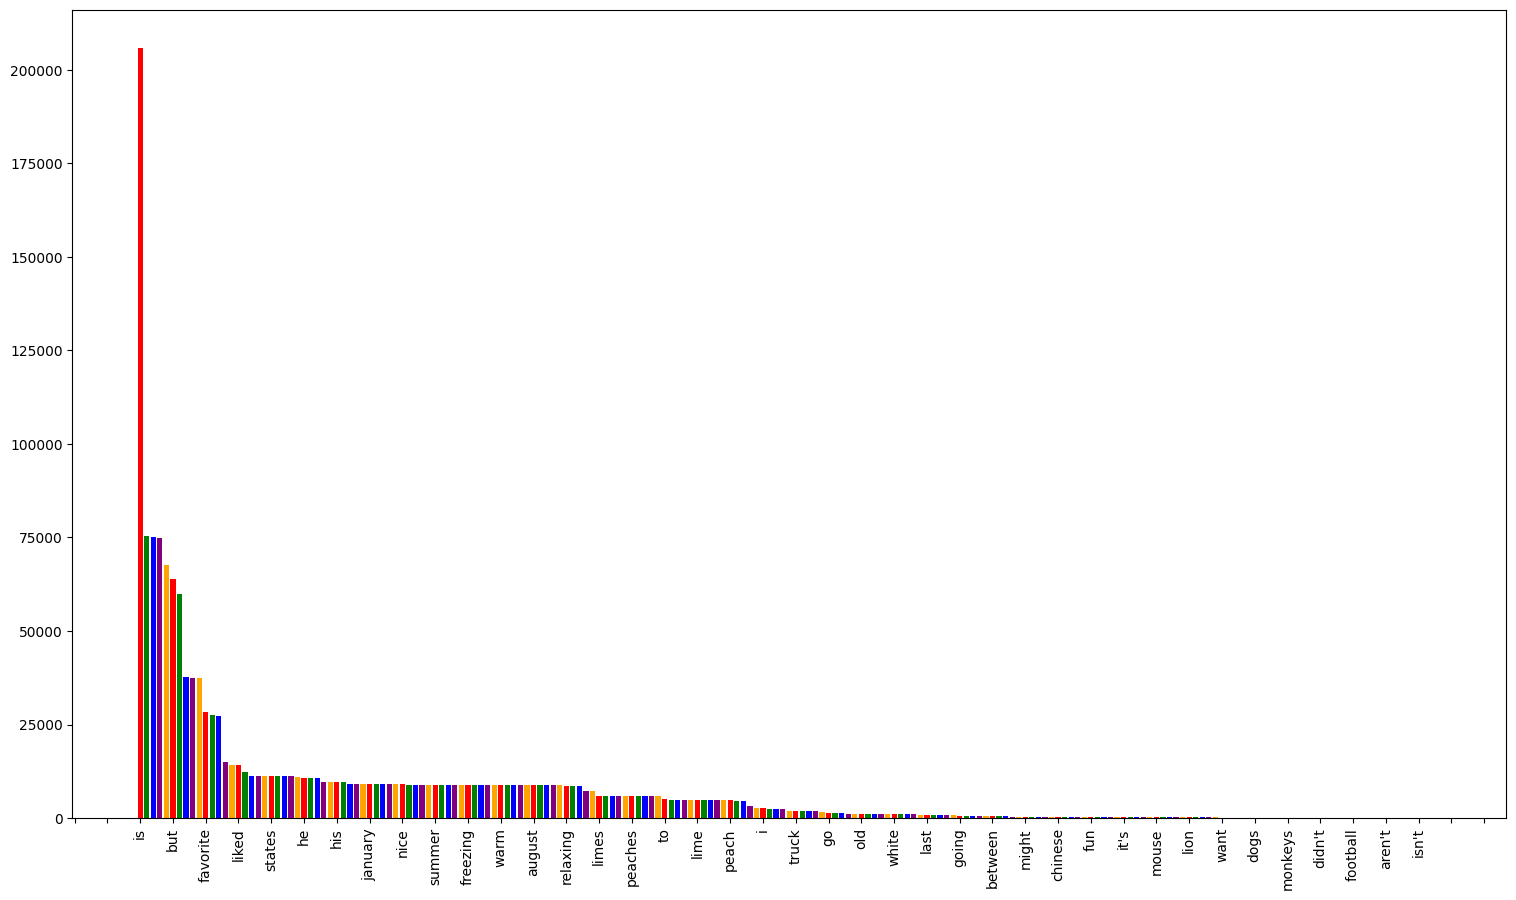

In [29]:
fig = plt.figure()
ax = plt.gca()
colors = ['red', 'green', 'blue', 'purple', 'orange']
ax.bar(x=eng_words, height=eng_counts, color=colors)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=90)

fig.set_size_inches(18.5, 10.5)

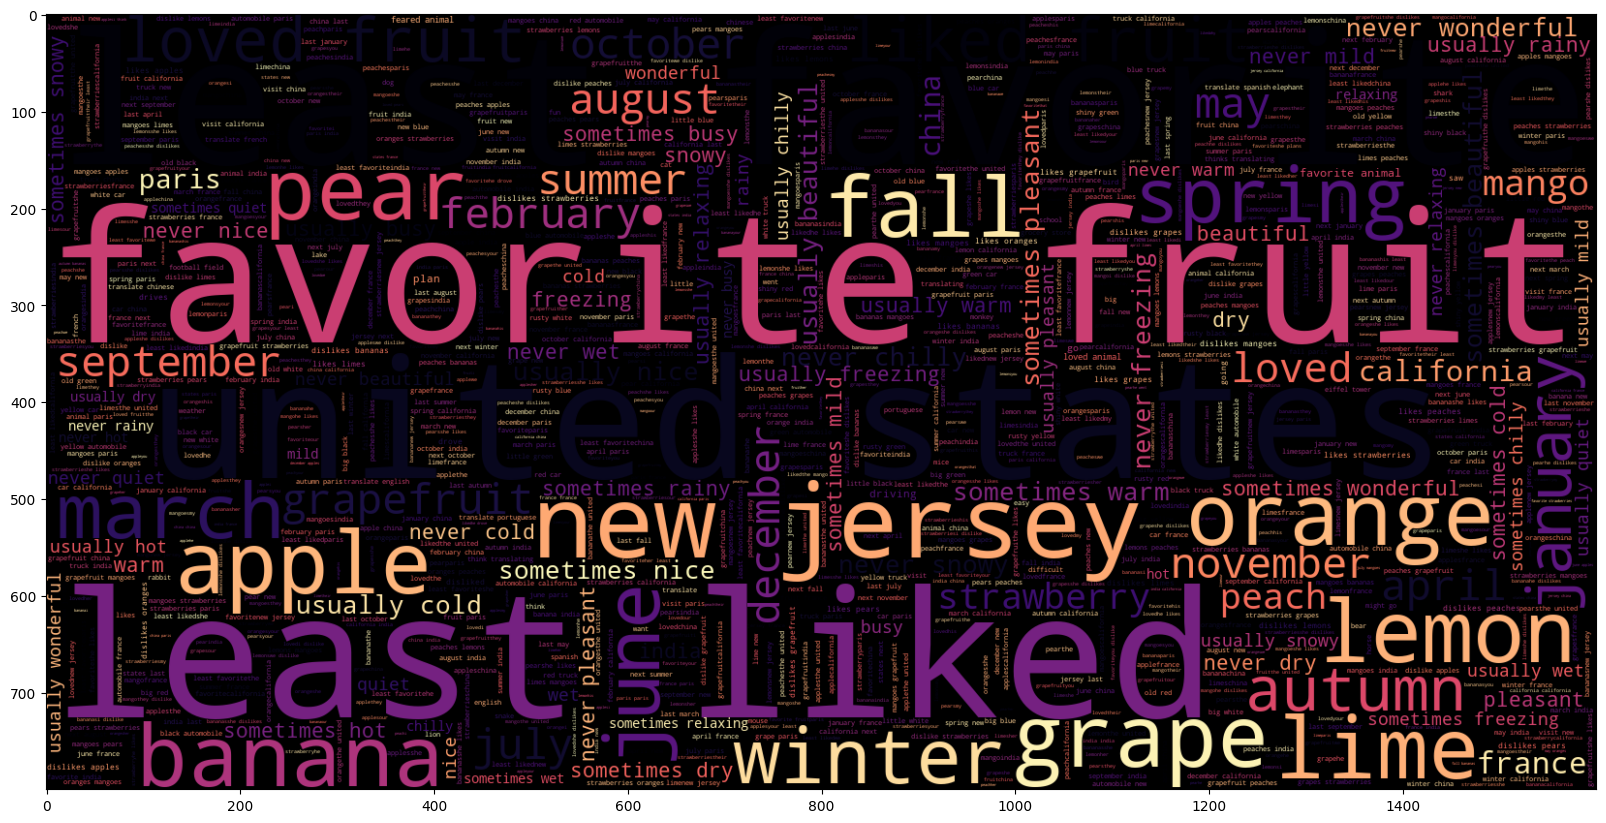

In [30]:
# word cloud 
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , colormap='magma' ).generate("".join(data.english))
plt.imshow(wc , interpolation = 'bilinear')

In [31]:
# Maximum length (number of words) per document

maxlen_eng = -1
for doc in data.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_eng < len(tokens)):
        maxlen_eng = len(tokens)
        
        
print("The maximum number of words in any document = ", maxlen_eng)

The maximum number of words in any document =  15


In [32]:
# count of french words

words = []
for i in data['french']:
  for word in i.split():
    words.append(word)
words

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril',
 'les',
 'états-unis',
 'est',
 'généralement',
 'froid',
 'en',
 'juillet',
 'et',
 'il',
 'gèle',
 'habituellement',
 'en',
 'novembre',
 'california',
 'est',
 'généralement',
 'calme',
 'en',
 'mars',
 'et',
 'il',
 'est',
 'généralement',
 'chaud',
 'en',
 'juin',
 'les',
 'états-unis',
 'est',
 'parfois',
 'légère',
 'en',
 'juin',
 'et',
 'il',
 'fait',
 'froid',
 'en',
 'septembre',
 'votre',
 'moins',
 'aimé',
 'fruit',
 'est',
 'le',
 'raisin',
 'mais',
 'mon',
 'moins',
 'aimé',
 'est',
 'la',
 'pomme',
 'son',
 'fruit',
 'préféré',
 'est',
 "l'orange",
 'mais',
 'mon',
 'préféré',
 'est',
 'le',
 'raisin',
 'paris',
 'est',
 'relaxant',
 'en',
 'décembre',
 'mais',
 'il',
 'est',
 'généralement',
 'froid',
 'en',
 'juillet',
 'new',
 'jersey',
 'est',
 'occupé',
 'au',
 'printemps',
 'et',
 'il',
 'est',
 'jamais',
 'chaude',
 'en',
 'mars',
 'n

In [33]:
french_words_counts = Counter(words)
french_words_counts

Counter({'est': 196809,
         'en': 105768,
         'il': 84079,
         'les': 65255,
         'mais': 63987,
         'et': 59851,
         'la': 49861,
         'parfois': 37746,
         'jamais': 37215,
         'le': 35306,
         "l'": 32917,
         'généralement': 31292,
         'moins': 27557,
         'aimé': 25852,
         'au': 25738,
         'fruit': 23626,
         'préféré': 23305,
         'agréable': 17751,
         'froid': 16794,
         'son': 16496,
         'chaud': 16405,
         'de': 15070,
         'plus': 14934,
         'automne': 14727,
         'mois': 14350,
         'à': 13870,
         'elle': 12056,
         'citrons': 11679,
         'paris': 11334,
         'inde': 11277,
         'états-unis': 11210,
         'france': 11170,
         'jersey': 11052,
         'new': 11047,
         'chine': 10936,
         'pendant': 10741,
         'pamplemousse': 10140,
         'mon': 9403,
         'votre': 9368,
         'juin': 9133,
         'p

In [34]:
# sort the dictionary by values
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

french_words_counts

[('est', 196809),
 ('en', 105768),
 ('il', 84079),
 ('les', 65255),
 ('mais', 63987),
 ('et', 59851),
 ('la', 49861),
 ('parfois', 37746),
 ('jamais', 37215),
 ('le', 35306),
 ("l'", 32917),
 ('généralement', 31292),
 ('moins', 27557),
 ('aimé', 25852),
 ('au', 25738),
 ('fruit', 23626),
 ('préféré', 23305),
 ('agréable', 17751),
 ('froid', 16794),
 ('son', 16496),
 ('chaud', 16405),
 ('de', 15070),
 ('plus', 14934),
 ('automne', 14727),
 ('mois', 14350),
 ('à', 13870),
 ('elle', 12056),
 ('citrons', 11679),
 ('paris', 11334),
 ('inde', 11277),
 ('états-unis', 11210),
 ('france', 11170),
 ('jersey', 11052),
 ('new', 11047),
 ('chine', 10936),
 ('pendant', 10741),
 ('pamplemousse', 10140),
 ('mon', 9403),
 ('votre', 9368),
 ('juin', 9133),
 ('printemps', 9100),
 ('janvier', 9090),
 ('hiver', 9038),
 ('mars', 9023),
 ('été', 8999),
 ('mai', 8995),
 ('septembre', 8958),
 ('juillet', 8956),
 ('avril', 8954),
 ('novembre', 8951),
 ('décembre', 8945),
 ('février', 8942),
 ('octobre', 8911),


In [35]:
french_words = []
french_counts = []
for i in range(len(french_words_counts)):
  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])

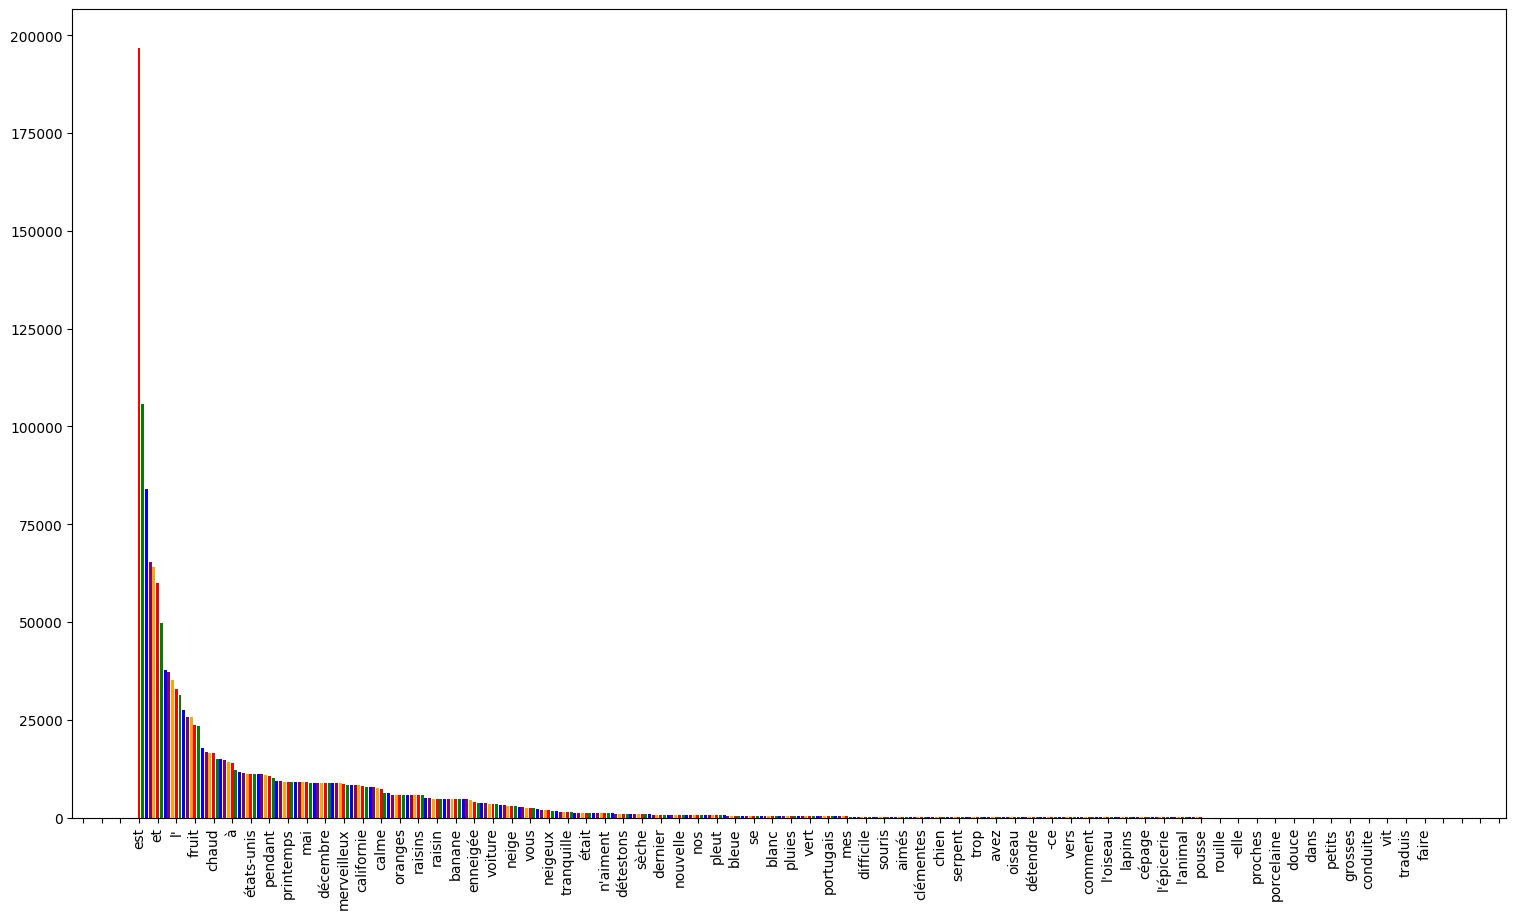

In [36]:
fig = plt.figure()
ax  = plt.gca()
colors = ['red', 'green', 'blue', 'purple', 'orange']
ax.bar(x=french_words, height=french_counts , color = colors)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=90)

fig.set_size_inches(18.5, 10.5)

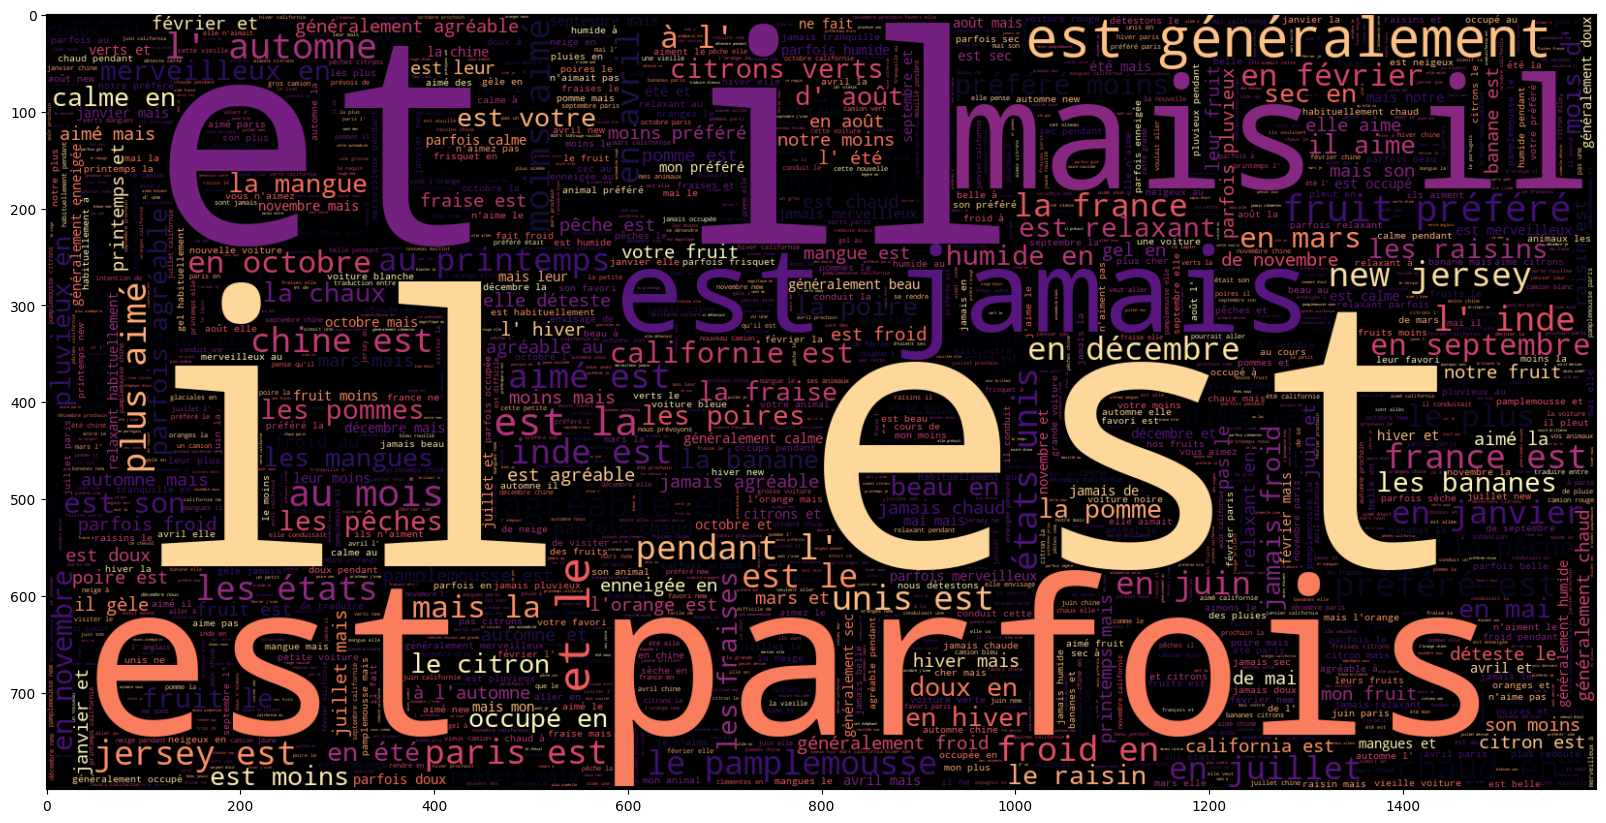

In [37]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , colormap = 'magma').generate("".join(data.french))
plt.imshow(wc , interpolation = 'bilinear')

In [38]:
# Maximum length (number of words) per document

maxlen_french = -1
for doc in data.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
        
print("The maximum number of words(french) in any document = ", maxlen_french)

The maximum number of words(french) in any document =  23


In [39]:
def tokenize_and_pad(x, maxlen):

  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)

  sequences = tokenizer.texts_to_sequences(x)
  #  make allsequences same size
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')

  return tokenizer, sequences, padded

In [40]:
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(data.english, maxlen_eng)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(data.french,  maxlen_french)

In [41]:
eng_vocab_size = total_eng_words + 1
print("Complete English Vocab Size:", eng_vocab_size)

Complete English Vocab Size: 200


In [42]:
french_vocab_size = total_french_words + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 351


In [43]:
print("The tokenized version for document\n", data.english[-1:].item(),"\n is : ", x_padded[-1:])

The tokenized version for document
 the orange is her favorite fruit  but the banana is your favorite  
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0]]


In [44]:
print("The tokenized version for document\n", data.french[-1:].item(),"\n is : ", y_padded[-1:])

The tokenized version for document
 l'orange est son fruit préféré  mais la banane est votre favori  
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0]]


In [45]:
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [46]:
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril         "

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

In [48]:
model = Sequential()
input_length = maxlen_eng
# Embedding layer
model.add(Embedding(eng_vocab_size, 256, input_length=maxlen_eng, mask_zero=True))

# Encoder
model.add(LSTM(256))

# Decoder
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences=True))

# Output layer
model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax')))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None,input_length))

# model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 15, 256)             │          51,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 23, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 23, 256)             │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 23, 351)             │          90,207 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,192,031 (4.55 MB)

 Trainable params: 1,192,031 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [50]:
model.fit(x_train, y_train, batch_size=1024, validation_split= 0.1, epochs=10)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.4615 - loss: 3.2522 - val_accuracy: 0.5142 - val_loss: 2.1572
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.5636 - loss: 1.8900 - val_accuracy: 0.6105 - val_loss: 1.5374
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.6197 - loss: 1.4724 - val_accuracy: 0.6564 - val_loss: 1.2804
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.6640 - loss: 1.2360 - val_accuracy: 0.6907 - val_loss: 1.1070
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.7006 - loss: 1.0528 - val_accuracy: 0.7295 - val_loss: 0.9422
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.7390 - loss: 0.9061 - val_accuracy: 0.7679 - val_loss: 0.8167
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.7761 - loss: 0.7856 - val_accuracy: 0.7935 - val_loss: 0.7231
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.8071 - loss: 0.6832 - val_accu

In [51]:
from keras.saving import save_model
save_model(model, "weights.keras")

In [52]:
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [53]:
def pad_to_text(padded, tokenizer):
    
    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in padded])

In [54]:
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - california is usually rainy during february but it is sometimes beautiful in june  

Original French word - californie est généralement pluvieux en février mais il est parfois beau en juin          

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
Predicted French word - californie est généralement pluvieux en octobre mais il est parfois beau en juin          




Original English word - our most loved fruit is the grape but your most loved is the lemon 

Original French word - nos fruits le plus aimé est le raisin mais votre plus aimé est le citron        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted French word - leurs fruits le plus aimé est le raisin mais leur plus aimé est le citron        




Original English word - we like grapes and oranges          

Original French word - nous aimons les raisins et les oranges                

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted French word - nous aimons les raisins et les oranges                




Original E